In [1]:
import gymnasium as gym
import numpy as np
import random

env = gym.make('CartPole-v1', render_mode="human")

class Agent:
    def __init__(self):
        self.Q = np.zeros((5**4,2))
        self.last_s = None
        self.last_a = None
        
    def quantize5(self, x, a, b):
        return 0 if x < -a else 1 if x < -b else \
               2 if x <= b else 3 if x <= a else 4

    def quantize(self, obs):
        pos = self.quantize5(obs[0], 1.2, 0.2)
        vel = self.quantize5(obs[1], 1.5, 0.2)
        ang = self.quantize5(obs[2], 0.25, 0.02)
        acc = self.quantize5(obs[2], 1.0, 0.2)
        return  pos + vel * 5 + ang * 25 + acc * 125
    
    def action(self, obs, episode, reward):
        s = self.quantize(obs)
        if random.random() > 0.5 * (1 / (episode + 1)):
            a = np.argmax(self.Q[s,:])
        else:
            a = random.randint(0, 1)
            
        if self.last_s is not None:
            q = self.Q[self.last_s, self.last_a]
            self.Q[self.last_s, self.last_a] = \
               q + 0.2 * (reward + 0.99 * np.max(self.Q[s,:]) - q)
        self.last_s = s
        self.last_a = a
        return a
    
agent = Agent()

steps = []
for episode in range(100):
    observation, info = env.reset()

    reward = 0
    for step in range(200):
        action = agent.action(observation, episode, reward)
        observation, reward, terminated, truncated, info = env.step(action)
        if terminated or truncated:
            agent.action(observation, episode, -200)
            break
            
    print('Episode {} finished after {} timesteps'.format(episode+1, step+1))
    steps.append(step+1)
env.close()

Episode 1 finished after 11 timesteps
Episode 2 finished after 11 timesteps
Episode 3 finished after 19 timesteps
Episode 4 finished after 19 timesteps
Episode 5 finished after 22 timesteps
Episode 6 finished after 11 timesteps
Episode 7 finished after 21 timesteps
Episode 8 finished after 17 timesteps
Episode 9 finished after 26 timesteps
Episode 10 finished after 75 timesteps
Episode 11 finished after 54 timesteps
Episode 12 finished after 147 timesteps
Episode 13 finished after 166 timesteps
Episode 14 finished after 178 timesteps
Episode 15 finished after 200 timesteps
Episode 16 finished after 184 timesteps
Episode 17 finished after 156 timesteps
Episode 18 finished after 200 timesteps
Episode 19 finished after 200 timesteps
Episode 20 finished after 190 timesteps
Episode 21 finished after 200 timesteps
Episode 22 finished after 200 timesteps
Episode 23 finished after 200 timesteps
Episode 24 finished after 200 timesteps
Episode 25 finished after 200 timesteps
Episode 26 finished 

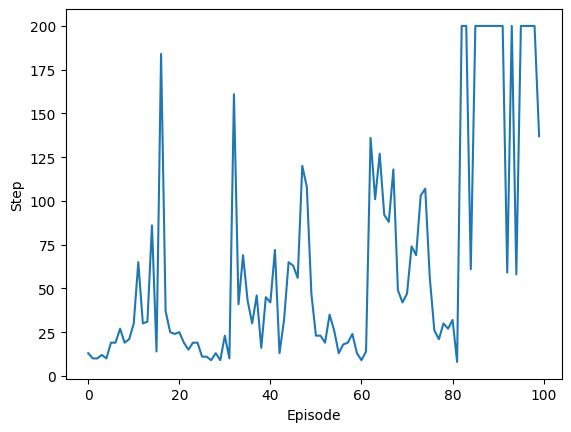

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(steps)
plt.xlabel('Episode')
plt.ylabel('Step')
plt.show()